In [1]:
import torchvision
import torch

In [2]:
torch.__version__
torchvision.__version__

'0.14.1'

In [3]:
#我之前已经下载好了！
my_alexnet = torchvision.models.alexnet()
my_alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
import torchvision.transforms as transforms

my_fault = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize([0.4914,0.4822,0.4465],[0.247,0.243,0.261])]
)

In [5]:
train_dateset = torchvision.datasets.CIFAR10(root = 'E:',train = True,transform = my_fault,download=True)

Files already downloaded and verified


In [6]:
test_dateset = torchvision.datasets.CIFAR10(root = 'E:',train = False,download=True)

Files already downloaded and verified


In [7]:
len(train_dateset.data)

50000

In [8]:
len(test_dateset)

10000

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn



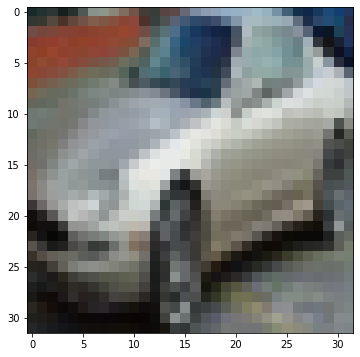

In [10]:
# 随机显示图片

a = np.random.randint(0,len(train_dateset))
img = train_dateset.data[a]
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.show()

In [11]:
from torch.utils.data import DataLoader
#dataloader的目的是用来 调节batch_size的作用
# next数据！！

In [12]:
train_dataloader = DataLoader(dataset= train_dateset,batch_size=16 ,shuffle= True)
test_dataloader = DataLoader(dataset=test_dateset)

In [13]:
train_dataloader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: E:
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261])
           )

Model

In [14]:
for param in my_alexnet.parameters():
    print(type(param))

<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>


In [15]:
for param in my_alexnet.parameters():
    param.requires_grad = False

In [16]:
#重新构建 最后一层！！
in_f = my_alexnet.classifier[6].in_features
print(in_f)
my_alexnet.classifier[6] = nn.Linear(in_f,10)

4096


In [17]:
learn_rate = 0.001
num_epochs = 10
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(my_alexnet.classifier[6].parameters(),lr = learn_rate,momentum=0.9)

In [18]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

print(device)

cuda


In [19]:
torch.cuda.is_available()

 
 
 
print(torch.cuda.device_count())
print(torch.cuda.is_available())
print(torch.backends.cudnn.is_available())
print(torch.cuda_version)
print(torch.backends.cudnn.version())



1
True
True
11.6
8302


In [20]:
#train
my_alexnet.to(device)
my_alexnet.train()
for epoch in range(num_epochs):
    print(f"epoch:{epoch+1}")
    #返回 索引 及值！
    for idx, (img,label) in enumerate(train_dataloader):
        #图片放cpu!!!
        images =  img.to(device)
        labels = label.to(device)
        #print(images.shape)
        output = my_alexnet(images)
        #print(output)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 10000 == 0:
            print(f"current loss = { loss.item()}")
        

epoch:1
current loss = 2.3045814037323
current loss = 2.3046414852142334
current loss = 2.298905611038208
current loss = 2.3045010566711426
current loss = 2.297875165939331
current loss = 2.3037571907043457
current loss = 2.304687023162842
current loss = 2.299530029296875
current loss = 2.303954839706421
current loss = 2.300779104232788
current loss = 2.2985761165618896
current loss = 2.3038246631622314
current loss = 2.300067663192749
current loss = 2.303713798522949
current loss = 2.3022537231445312
current loss = 2.2991037368774414
current loss = 2.3032984733581543
current loss = 2.302204132080078
current loss = 2.3038887977600098
current loss = 2.3025588989257812
current loss = 2.3062057495117188
current loss = 2.3001952171325684
current loss = 2.2979576587677
current loss = 2.298529624938965
current loss = 2.3026084899902344
current loss = 2.304960012435913
current loss = 2.303532123565674
current loss = 2.308176040649414
current loss = 2.3024802207946777
current loss = 2.30030512

In [21]:
#eval
my_alexnet.to(device)
my_alexnet.eval()
for image,label in test_dataloader:
    for idx, (img,label) in enumerate(train_dataloader):
        images = img.to(device)
        labels = label.to(device)
        output = my_alexnet(images)


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>